# Leasson 4, Activity 1: Working with adult income dataset (UCI)

In this acitvity, you will work with **Adult Income Dataset** from UCI Machine Learning portal. The Adult Income data set has been used in many machine learning papers that address classification problems. You will read the data from a CSV file into a Pandas DataFrame and do practice some of the advanced data wrangling you learned in this Lesson.

### URL for downloading the data
We have the data downloaded as a CSV file on the disk for your ease. However, it is recommended to practice data download on your own so that you are familiar with the process.

**Here is the URL for the data set**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

**Here is the URL for the description of the data set and the variables (at the end of the document)**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

### Attributes/Variables

Following are the details of the type of the attributes of this dataset for your reference. You may have to refer them while answering question on this activity. Note that, many of the attributes are of discrete factor type. These are common type for a classification problem unlike continuous numeric values used for regression problems.

* __age__: continuous.
* __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt__: continuous.
* __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num__: continuous.
* __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex__: Female, Male.
* __capital-gain__: continuous.
* __capital-loss__: continuous.
* __hours-per-week__: continuous.
* __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### A special note on the variable 'fnlwgt':

The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls. These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. 

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Load necessary libraries

In [51]:
# Imported the numpy, pandas and matplotlib libraries as abbreviations 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read in the adult income data set (given as a .csv file) from the local directory and check first 5 records

In [54]:
# Created the df variable to contain the Adult Income csv file using pandas read_csv function
df = pd.read_csv("adult_income_data.csv")
# To check the first few records/rows, the head function is used in conjuntion with df
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


### Do you think the column names (headers) make sense?

In [56]:
# The column names do not make sense, because there is no header. The header line above is the first row. 

### Time to read in the text file with data descriptions and extract header names
Write a file reading script which reads the text file line by line, and extracts the first phrase which is the header name

In [57]:
# Created a names list and for loop that reads the text file line by line and extracts the first phrase with is the header name
names = []
with open('adult_income_names.txt','r') as f:
    for line in f:
        f.readline()
        var=line.split(":")[0]
        names.append(var)

In [58]:
# Displays the names of the headers
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

### Add a name ("_Income_") for the response variable (last column) to the dataset and read it again with the column names supplied 

In [59]:
# Adds a name "Income" to the names list as a last column
names.append('Income')

In [60]:
# Adds the names list to the csv file and contains it in df
df = pd.read_csv("adult_income_data.csv",names=names)
# To check the first few records/rows, the head function is used in conjuntion with df
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


### Show a statistical summary of the data set. Did you notice only a small number of columns are included?

In [61]:
# Use the describe function to show a statistical summary of df dataframe
df.describe()
# Yes, only a subset of the columns were included - these columns are the ones with numerical values, rather than string. 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Many variables in the dataset have multiple factors or classes. Can you write a loop to count and print them?

In [62]:
# Created vars_class variable to make a list of all variables with classes
vars_class = ['workclass','education','marital-status','occupation','relationship','sex','native-country']

In [63]:
# Created a for loop to ount and print the variables in the dataset that have multiple factors or classes
for v in vars_class:
    classes=df[v].unique()
    num_classes = df[v].nunique()
    print("There are {} classes in the \"{}\" column. They are: {}".format(num_classes,v,classes))
    print("-"*100)

There are 9 classes in the "workclass" column. They are: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------------------------------------------------------------------------
There are 16 classes in the "education" column. They are: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------------------------------------------------------------------------------------------------
There are 7 classes in the "marital-status" column. They are: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
----------------------------------------------------------------------------------------------------
There are 15 classes in the "occupation" column. They are: [' Adm-clerical' ' Exec

### Is there any missing (NULL) data in the dataset? Write a single line of code to show this for all coumns

In [64]:
# Used the isnull and sum functions on the df dataframe to find the any misssing (NULL) values in the df dataset
df.isnull().sum()
# Yes, there are missing data values, and they are listed below

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

### Practice subsetting: Create a DataFrame with only 
* age, 
* education,
* occupation
* race

In [69]:
# there is no column "race" in df or csv, therefore it has been omitted from df_subset variable below
# Created df_subset variable that contains the df dataframe's age, education, and occupation columns
df_subset = df[['age','education','occupation']] 
# To check the first few records/rows, the head function is used in conjuntion with df_subset
df_subset.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


### Show the histogram of age with bin size = 20

<AxesSubplot:>

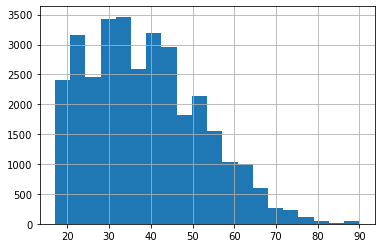

In [70]:
# Created a histogram of the df_subset variable above with age column only and bin size 20 using hist function
df_subset['age'].hist(bins=20)

### Show boxplots of _age_ grouped by _race_ (Use a long figure size 15x6 and make _x_ ticks font size 15 )

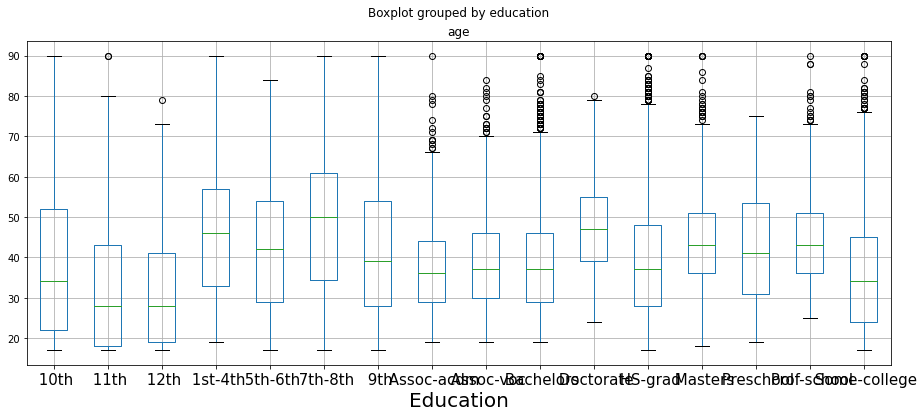

In [71]:
# there is no column "race" in df or csv file, therefore it has substituted with "education"
# Created a boxplot of df dataframe's age and education columns using boxplot function and modified the x-axis ticks and labels
df_subset.boxplot(column='age',by='education',figsize=(15,6))
plt.xticks(fontsize=15)
plt.xlabel("Education",fontsize=20)
plt.show()

### Before doing further operation, we need to use the skill with 'apply' method we learned in this lesson. <br><br> But why? - Turns out that during reading the dataset from the CSV file, all the strings came with a whitespace character in front. So, we need to remove that whitespace from all the strings. 

### Let's write a small function to strip the whitespace character

In [72]:
# Created a function to strip the whitespace characters from the df_subset dataframe using strip function
def strip_whitespace(s):
    return s.strip()

### Use the 'apply' method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

#### This is the preferred method so that you don't accidentally delete valuable data. Most of the time, create a new column with a desired operation and then copy it back to the old column if necessary.

#### IGNORE any warning messages printed.

In [77]:
# Education column
# Used the apply method to apply the above strip_whitespaces function to all the string value columsn, create a new column, copy
# the values from this new column to the old column, and drop the new column
df_subset['education_stripped']=df['education'].apply(strip_whitespace)
df_subset['education']=df_subset['education_stripped']
df_subset.drop(labels=['education_stripped'],axis=1,inplace=True)

# Occupation column
# Used the apply method to apply the above strip_whitespaces function to all the string value columsn, create a new column, copy
# the values from this new column to the old column, and drop the new column
df_subset['occupation_stripped']=df['occupation'].apply(strip_whitespace)
df_subset['occupation']=df_subset['occupation_stripped']
df_subset.drop(labels=['occupation_stripped'],axis=1,inplace=True)

# there is no column "race" in df or csv, therefore it has been omitted from this section even though it is a string value

<ipython-input-77-b754d1785c58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['education_stripped']=df['education'].apply(strip_whitespace)
<ipython-input-77-b754d1785c58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['education']=df_subset['education_stripped']
<ipython-input-77-b754d1785c58>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

### Answer the following question using conditional filtering/boolean indexing: <br><br> _"How many black people of age between 30 and 50 (inclusive) are represented in this dataset?"_

In [78]:
# Write a code with conditional clauses and join them by & (AND) to filter the dataframe

# there is no column "race" in df or csv file, therefore it has substituted with "education"
# Created df_filtered dataframe using the df_subset dataframe's education (Bachelor's), age (above 30 and below 50)
df_filtered=df_subset[(df_subset['education']=='Bachelors') & (df_subset['age']>=30) & (df_subset['age']<=50)] #subbed out race for education

In [79]:
# To check the first few records/rows, the head function is used in conjuntion with df_filtered
df_filtered.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
9,42,Bachelors,Exec-managerial
11,30,Bachelors,Prof-specialty
32,45,Bachelors,Exec-managerial


In [80]:
# We can look at the shape of the filtered dataframe and take the 1st element at 0 index of the tuple
# Created answer_1 variable to show df_filtered's shape
answer_1=df_filtered.shape[0]

In [82]:
# Because "race" is not a column in the df or csv, substutited question above with: 
# "How many people between 30 and 50 (inclusive) with a bachelors degree are represented in this dataset?"
# Used the print function of the answer_1 variable above to answer the exercise question
print("There are {} people with Bachelors degrees of age between 30 and 50 in this dataset.".format(answer_1))

There are 3096 people with Bachelors degrees of age between 30 and 50 in this dataset.


### Practice "GroupBy": Group by race and education to show how the mean age is distributed

In [83]:
# there is no column "race" in df or csv file, therefore it has substituted with "education"
# Used df_subset and groupby and mean functions to show how occupation and education mean age is distrubuted
df_subset.groupby(['occupation','education']).mean()

age
occupation       education              
?                10th          33.656863
                 11th          32.252101
                 12th          30.975000
                 1st-4th       63.833333
                 5th-6th       53.966667
...                                  ...
Transport-moving Doctorate     47.000000
                 HS-grad       39.347879
                 Masters       39.400000
                 Prof-school   59.000000
                 Some-college  38.385159

[217 rows x 1 columns]

### Group by occupation and show the summary statistics of age. Try to answer the following questions,
* Which profession has oldest workers on the average?
* Which profession has its largest share of workforce above 75th percentile?

In [84]:
# Used df_subset and groupby and describe functions go group occupation and show summary stats of age
df_subset.groupby('occupation').describe()['age']
# Occupations "?" and "Adm-clerical" have the oldest workers on average, with a mean age of 40.88 and 36.96, respecitively 
# Occupation "?" has the largest share of workforce above the 75% percentile, 61.0.

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


### Detecting outlier: Is there a particular occupation group which has very low representation? Perhaps we should remove those data because with very low data the group won't be useful in analysis

Actually, just by looking at the table above, you should be able to see that **'Armed-Forces'** group has only 9 count i.e. 9 data points. But how to detect it. Plot the count column in a bar chart.

Note, how the first argument to the barh function is the index of the dataframe which is the summary stats of the occupation groups. We see that 'Armed-Forces' group has almost no data.

#### This exercise teaches you that sometimes, outlier is not just a value but can be a whole group. The data of this group is fine but it is too small to be useful for any analysis. So it can be treated as an outlier in this case. 

#### But always use your business knowledge and engineering judgement for such outlier detection and how to process them.

In [85]:
# Created occupation_stats variable by using df_subset dataframe and groupby (occupation) and describe (age) functions
occupation_stats= df_subset.groupby('occupation').describe()['age']

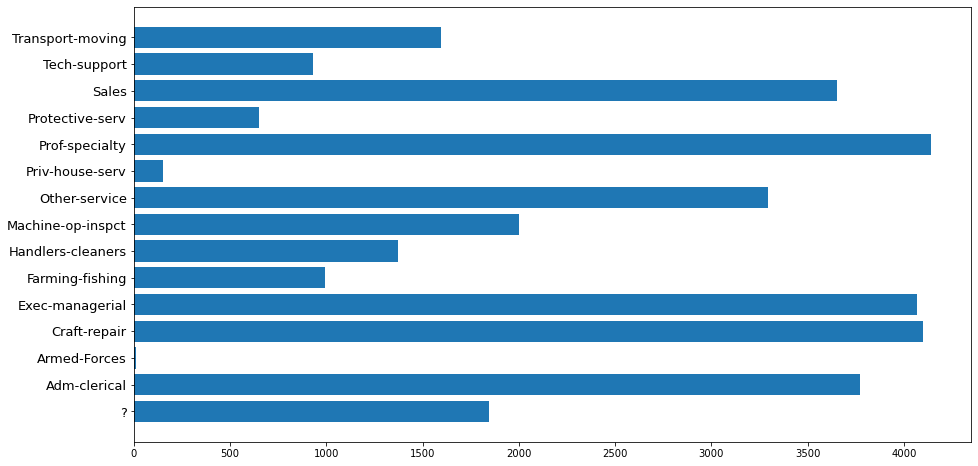

In [87]:
# Plotted the occupation_stats using matplotlib to show the count of each occupation in the dataset
plt.figure(figsize=(15,8))
plt.barh(y=occupation_stats.index,width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()
# Armed-Forces and Priv-house-serve occupations have the lowest representation in the dataset

### Practice Merging by common keys: Suppose you are given two datasets where the common key is `occupation`. Can you merge them? 

#### First create two such disjoint datasets by taking random samples from the full dataset and then try merging. Include at least 2 other columns along with the common key column for each dataset.

#### Notice how the resulting dataset, after merging, may have more data points than either of the two starting datasets if your common key is not unique? Why is it so?

In [43]:
# Created df_1 dataframe using df dataframe's columns age workclass and occupation and created a simple random sample of 100 using sample function
df_1 = df[['age','workclass','occupation']].sample(5,random_state=101)

In [44]:
# To check the first few records/rows, the head function is used in conjuntion with df_1
df_1.head()

,age,workclass,occupation
22357,51,Private,Machine-op-inspct
26009,19,Private,Sales
20734,40,Private,Exec-managerial
17695,17,Private,Handlers-cleaners
27908,61,Private,Craft-repair


In [47]:
# Created df_2 dataframe using df dataframe's columns education, age and occupation
df_2 = df[['education','age','occupation']].sample(5,random_state=101)

In [48]:
# To check the first few records/rows, the head function is used in conjuntion with df_2
df_2.head()

,education,age,occupation
22357,HS-grad,51,Machine-op-inspct
26009,11th,19,Sales
20734,HS-grad,40,Exec-managerial
17695,10th,17,Handlers-cleaners
27908,7th-8th,61,Craft-repair


In [49]:
# Created df_merged to merge df_1 and df_2 using merge function and removed duplicates using drop_duplicates function
df_merged = pd.merge(df_1,df_2,on='occupation',how='inner').drop_duplicates()

In [50]:
# Display the new df_merged dataframe
df_merged

,age_x,workclass,occupation,education,age_y
0,51,Private,Machine-op-inspct,HS-grad,51
1,19,Private,Sales,11th,19
2,40,Private,Exec-managerial,HS-grad,40
3,17,Private,Handlers-cleaners,10th,17
4,61,Private,Craft-repair,7th-8th,61


In [ ]:
# Notice how the resulting dataset, after merging, may have more data points than either of the two starting datasets if 
# your common key is not unique. Why is it so?
# In df_1 and df_2, there are two unique columns (education and workclass) and two nonunique columns (age and occupation)
# One of the nonunique columns, occupation, comes across only once in df_merged, where age comes across twice (age_x, age_y)
# In merging the two dataframes, the code joins the dataframes at the "occupation" column with an "inner" join intersection
# which results in age being listed twice from both dataframes (age_x, age_y), and the resulting dataframe having more values 
# (which more values is generally a result of merging dataframes)